# CS251/2: Data Analysis and Visualization

## PCA Applications: Optdigits Numeric Digit Dataset

Spring 2021

Oliver W. Layton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import palettable
from plots import plotGrid, show_digit

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Load in Optdigits

CSV filename: `optdigits.csv`

### Format

- 3823 samples
- 64 variables (each image sample is a 8x8 images with one variable per pixel value)
- 65 columns in `optdigits.csv` : last column is the label for the digit in the image (0-9)

In [3]:
digitData = np.loadtxt('optdigits.csv', delimiter=',')
digitData.shape
digits1D = digitData[:, :-1]
labels = digitData[:, -1]
print(digits1D.shape)
print(labels.shape)

(3823, 64)
(3823,)


Let's convert each 1D image representation into 2D (reshape) and plot some individual digits

In [5]:
digits2D = np.reshape(digits1D, [digits1D.shape[0], 8, 8])
digits2D.shape

(3823, 8, 8)

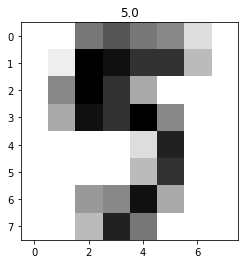

In [6]:
ind = 7
show_digit(digits2D[ind], labels[ind])

Let's plot the 1st 100 digits in a 10x10 grid to get a sense of the data more holistically

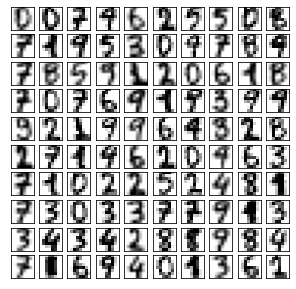

In [7]:
plotGrid(digits2D[:100], numRows=10, numCols=10, figsize=(5,5))

## Run PCA on digit data

#### Let's run PCA on one digit (e.g. 6). How many principal components to we need to accurately represent and reconstruct the handwritten digits?

In [8]:
from pca_cov import PCA_COV

Use **logical indexing** to select image samples whose label is the digit we care about (e.g. 6)

In [11]:
myArr = np.arange(10)
print(myArr)
myArr < 5
myArr[myArr < 5]

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, 3, 4])

In [13]:
myArr[myArr == 5]
myArr[myArr > 5]

array([6, 7, 8, 9])

In [14]:
digits1D.shape

(3823, 64)

In [16]:
labels

array([0., 0., 7., ..., 6., 6., 7.])

In [18]:
labels.shape

(3823,)

In [22]:
theSixes = digits1D[labels == 6]
theSixes.shape

(377, 64)

Create a DataFrame to hold the digit data, create a PCA object

In [24]:
sixes_ds = pd.DataFrame(data=theSixes)
sixes_ds.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,4.0,12.0,14.0,7.0,0.0,0.0
1,0.0,0.0,0.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,1.0,11.0,14.0,12.0,1.0,0.0
2,0.0,0.0,2.0,14.0,10.0,0.0,0.0,0.0,0.0,1.0,...,15.0,0.0,0.0,0.0,1.0,12.0,14.0,12.0,4.0,0.0
3,0.0,0.0,2.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,4.0,15.0,12.0,9.0,1.0,0.0
4,0.0,0.0,2.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,0.0,2.0,12.0,14.0,12.0,4.0,0.0


In [25]:
pca = PCA_COV(sixes_ds)

Do we need to normalize? Let's check the global range of the digits

In [26]:
print(np.min(digits1D))
print(np.max(digits1D))

0.0
16.0


In [28]:
varNames = np.arange(64)
# varNames
pca.pca(varNames, normalize=True)

Let's run PCA on the digit image vectors then project back from pca space to the data space using the top $k$ PCs so that we can visualize how well those $k$ capture the digit's shape.

Then let's plot and compare the following:
- the image of the mean of all the images of 6s in the dataset
- some reconstructions of the first bunch of samples in the grid
- original images of the 6s in the dataset

In [29]:
theSixes.shape

(377, 64)

In [31]:
theSixesMean = np.mean(theSixes, axis=0)
theSixesMean.shape
theSixesMean2D = np.reshape(theSixesMean, [8, 8])
theSixesMean2D.shape

(8, 8)

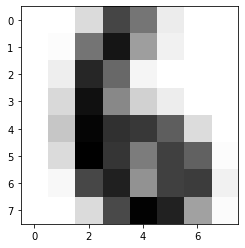

In [35]:
plt.imshow(theSixesMean2D, cmap='gray_r')
plt.show()

In [54]:
k = 1
sixesRecon = pca.pca_then_project_back(k)
sixesRecon.shape

(377, 64)

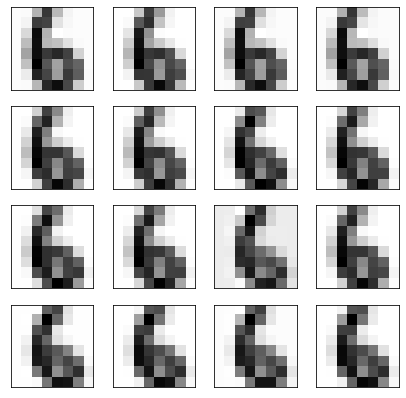

In [55]:
sixesRecon2D = np.reshape(sixesRecon, [sixesRecon.shape[0], 8, 8])
sixesRecon2D.shape
plotGrid(sixesRecon2D[:16], numRows=4, numCols=4, figsize=(7,7))

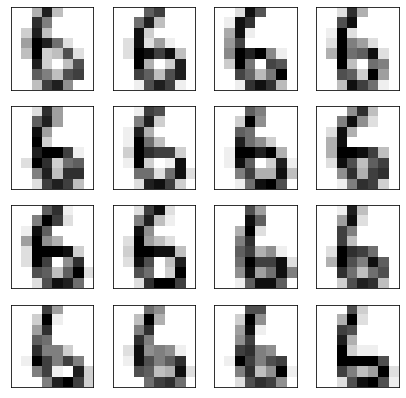

In [53]:
theSixes2D = np.reshape(theSixes, [theSixes.shape[0], 8, 8])
plotGrid(theSixes2D[:16], numRows=4, numCols=4, figsize=(7,7))

#### Let's visualize the top k PCs themselves (eigenvectors): 

*Remember to transpose e_vecs when plotting as image with imshow*

In [57]:
e_vecs2D = np.reshape(pca.e_vecs.T, [pca.e_vecs.shape[0], 8, 8])
print(pca.e_vecs.shape)
e_vecs2D.shape

(64, 64)


(64, 8, 8)

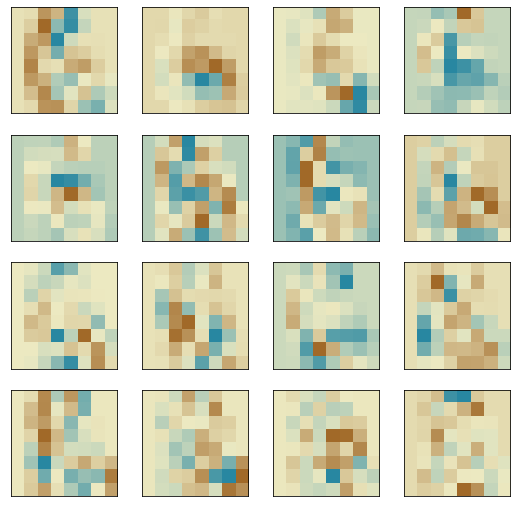

In [60]:
cmap = palettable.cartocolors.diverging.Earth_3.get_mpl_colormap()
plotGrid(e_vecs2D[:16], numRows=4, numCols=4, cmap=cmap, figsize=(9,9))

- orange means values > the mean.
- blue means values < the mean

Each PC shows us a **basis vector**: one key component/part of the digit derived from the data. 

The larger the PC (smaller the PC number; closer to the top left), the more important this component is in accounting for/recreating the 6 digits in the dataset.

**Together, the PCs tell us in a computational sense what it means to be a "6".**
